downloading necessary modules

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


reading features + ground truth 

In [21]:
features_df = pd.read_csv('ctd_cadiovascular_20240223_scores.tsv', sep='\t')
ground_truth_df = pd.read_csv('merged_cardio.tsv', sep='\t')

print(features_df)
print(ground_truth_df)

           drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  \
0        DB06709  DB08506  0.3427     0    0.6150       0.630     0.46   
1        DB06709  DB02376  0.4188     0    0.6850       0.685     0.56   
2        DB06709  DB04282  0.4188     0    0.6850       0.685     0.56   
3        DB06709  DB04564  0.4188     0    0.6850       0.685     0.56   
4        DB06709  DB04659  0.4188     0    0.6850       0.685     0.56   
...          ...      ...     ...   ...       ...         ...      ...   
9730661  DB08873  DB07191  0.1295     0    0.6093       0.625     0.44   
9730662  DB08873  DB08846  0.1319     0    0.4865       0.460     0.20   
9730663  DB08873  DB08865  0.1585     0    0.4858       0.480     0.26   
9730664  DB08873  DB05891  0.1004     0    0.8725       0.870     0.65   
9730665  DB08873  DB05508  0.2084     0    0.5350       0.530     0.41   

         maxspAB    zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  \
0           0.74  0.5097  1.3545  ... 

merge features, ground truth over drugA drugB 

In [22]:
merged_df = pd.merge(features_df, ground_truth_df, on=['drugA', 'drugB'])
merged_df.set_index(['drugA', 'drugB'], inplace=True)
print(merged_df)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB00908  0.2497     0    0.5420       0.470     0.42     0.86 -1.0162   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -1.0162   
        DB01109  0.0183     0    0.2867       0.340     0.12     0.40 -1.0162   
        DB00606  0.3436     0    0.5617       0.540     0.40     0.78 -1.0162   
        DB00482  0.2900     0    0.4883       0.495     0.29     0.67 -1.0162   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08899 DB08932  0.1233     0    0.3000       0.300     0.28     0.32 -1.2095   
DB08905 DB08932  0.3833     0    0.5550       0.555     0.55     0.56  0.2120   
DB08918 DB08932  0.1547     0    0.5200       0.520     0.41     0.61 -2.0170   
DB08932 DB08953  0.3467     0    0.5200       0.520     0.51     0.53 -0.2648   
        DB08954  0.0550     

X and Y for training and testing

In [23]:
X = merged_df.drop(['adv/app','drugcomb','sA','sB','opA','opB'], axis=1)                     #Annahme: 'adv/app' ist Ihre Zielvariable
Y = merged_df['adv/app']

print(Y)



drugA    drugB  
DB00001  DB00908    0
         DB00721    0
         DB01109    0
         DB00606    0
         DB00482    0
                   ..
DB08899  DB08932    0
DB08905  DB08932    0
DB08918  DB08932    0
DB08932  DB08953    0
         DB08954    0
Name: adv/app, Length: 48622, dtype: int64


split of train and test groups, decisiontreeclassifier, look at feature importances + calculate cumulative sum of features + plot L50

Accuracy: 0.9969151670951156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.26      0.64      0.38        14

    accuracy                           1.00      9725
   macro avg       0.63      0.82      0.69      9725
weighted avg       1.00      1.00      1.00      9725

                 Actual  Predicted
drugA   drugB                     
DB00222 DB00999       0          1
DB00822 DB01098       0          1
DB00559 DB00999       0          1
DB01342 DB04861       0          1
DB00668 DB01320       0          1
DB00281 DB00750       1          0
DB00232 DB00968       0          1
DB00281 DB08906       0          1
DB00542 DB00914       0          1
DB00308 DB00825       0          1
DB00281 DB00635       0          1
DB00201 DB00945       1          0
DB00228 DB00627       0          1
DB00281 DB01718       1          0
DB00421 DB01219       0          1
DB00489 DB00825       0          1
DB00401 DB0111

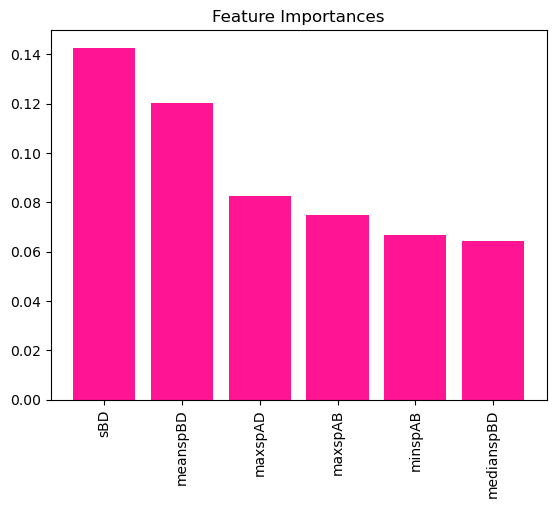

'\nreport unbalanced: \n\nAccuracy: 0.997120822622108\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      9711\n           1       0.25      0.50      0.33        14\n\n    accuracy                           1.00      9725\n   macro avg       0.62      0.75      0.67      9725\nweighted avg       1.00      1.00      1.00      9725\n'

In [25]:
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, Y_train)

#accuracy = clf.score(X_test, Y_test)
# Ausgabe der Genauigkeit und des Klassifikationsberichts

#see sklearn documentation: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
#print(comparison.head(20))
#specific_drug_combination = ('DB01599', 'DB04825')
# Create a boolean mask where 'Actual' and 'Predicted' values are not equal
mask = comparison['Actual'] != comparison['Predicted']

# Apply this mask to your DataFrame to filter rows
differences = comparison[mask]

#28 falsch predicted
print(differences)
print(len(differences))

#print(filtered_df)
cumulative_importances = np.cumsum(importances[indices])

num_features_50 = np.where(cumulative_importances >= 0.5)[0][0] + 1

# Die wichtigsten Features plotten, die zusammen bis zu 50% der Wichtigkeit ausmachen
plt.figure()
plt.title("Feature Importances")
plt.bar(range(num_features_50), importances[indices][:num_features_50], color='deeppink')
plt.xticks(range(num_features_50), X.columns[indices][:num_features_50], rotation=90)
plt.show()
'''
report weights balanced:

Accuracy: 0.9969151670951156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.26      0.64      0.38        14

    accuracy                           1.00      9725
   macro avg       0.63      0.82      0.69      9725
weighted avg       1.00      1.00      1.00      9725

'''
'''
report unbalanced: 

Accuracy: 0.997120822622108
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.25      0.50      0.33        14

    accuracy                           1.00      9725
   macro avg       0.62      0.75      0.67      9725
weighted avg       1.00      1.00      1.00      9725
'''

In [17]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.26      0.64      0.38        14

    accuracy                           1.00      9725
   macro avg       0.63      0.82      0.69      9725
weighted avg       1.00      1.00      1.00      9725

